# Business Understanding
In today's digital marketplace, technology brands and product companies are frequently discussed on social media platforms such as twitter. These online conversations provide valuable real-time feedback on customer experiences, satisfaction, and concerns. However, due to the large volume of posts generated daily, it is impractical for companies to manually monitor and analyze public sentiment.

The goal of this project is to develop a Natural Language Processing(NLP) model capable of automatically classifying tweets based on the emotion expressed toward a brand or product. Specifically, the model aims to identify whether a tweet conveys positive emotion, negative emotion, or no emotion toward a product or company.

By transforming unstructured tweet text into actionable sentiment insights, this project demonstrates how machine learning can support data-driven decision-making in brand management and customer engagement.

# Overview
This project uses Twitter data to analyze public sentiment towards major technology brands and products. Tweets were cleaned,transformed into numerical features, and explored through visualizations and pivot tables to reveal sentiment patterns by brand. Machine learning models were built to classify tweets as positive, negative or neutral with logistics regression performing best after addressing class imbalance. The results demonstrate how social media sentiment can provide valuable insights into customer perception and brand reputation.

# Objective
The objective of this project was to analyze and predict sentiment towards technology brands using Twitter data by cleaning text, building machine learning models, improving perfomance through class balancing, and visualizing sentiment trends to support business insights.

In [1]:
import pandas as pd
import numpy as np

In [6]:
travel_df = pd.read_csv(
    "../Data/judge-1377884607_tweet_product_company.csv",
    encoding="latin1"
)

travel_df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [8]:
travel_df.shape

(9093, 3)

In [9]:
travel_df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [10]:
travel_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts

<bound method IndexOpsMixin.value_counts of 0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
9088                      Positive emotion
9089    No emotion toward brand or product
9090    No emotion toward brand or product
9091    No emotion toward brand or product
9092    No emotion toward brand or product
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 9093, dtype: object>

In [11]:
travel_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# Imports

In [13]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mwiti444/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\s+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

In [15]:
travel_df['clean_tweet'] = travel_df['tweet_text'].apply(clean_tweet)

In [16]:
travel_df[['tweet_text', 'clean_tweet']].head()

,tweet_text,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley g iphone hrs tweeting riseaustin dead n...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope years festival isnt crashy years iph...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff fri sxsw marissa mayer g...


# Turning text into numbers and Training baseline model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = travel_df['clean_tweet']
Y = travel_df['is_there_an_emotion_directed_at_a_brand_or_product']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, Y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        32
                  Negative emotion       0.62      0.09      0.15       115
No emotion toward brand or product       0.69      0.88      0.77      1083
                  Positive emotion       0.63      0.44      0.51       589

                          accuracy                           0.67      1819
                         macro avg       0.48      0.35      0.36      1819
                      weighted avg       0.65      0.67      0.64      1819



/Users/mwiti444/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mwiti444/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mwiti444/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

# Explanation
A baseline logistic Regression classifier was trained using TF-IDF features. The model achieved an overall accuracy of approximately 67%, performing best at identifying tweets with no expressed emotion towards brands or products. Perfomance was lower for negative sentiment, indicating class imbalance and thr difficulty of detecting sublte negative expressions in short text.

# Training Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print(classification_report(y_test, nb_pred))

                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        32
                  Negative emotion       0.50      0.02      0.03       115
No emotion toward brand or product       0.66      0.91      0.76      1083
                  Positive emotion       0.63      0.33      0.44       589

                          accuracy                           0.65      1819
                         macro avg       0.45      0.32      0.31      1819
                      weighted avg       0.63      0.65      0.60      1819



/Users/mwiti444/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mwiti444/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mwiti444/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

# Explanation
A Multinomial Naive Bayes classifier was trained and evaluated as a second model. Its perfomance was comparable to logistic Regression, achieving approximately 65% accuracy. Both models performed best at identifying tweets with no expressed emotion, while negative sentiment remained difficult to classify. Logistic Regression slighty outperformed Naive Bayes overall and was selected as the final model.

# Improvement of negative sentiment recall

In [21]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

                                    precision    recall  f1-score   support

                      I can't tell       0.02      0.03      0.02        32
                  Negative emotion       0.29      0.54      0.38       115
No emotion toward brand or product       0.76      0.67      0.71      1083
                  Positive emotion       0.58      0.59      0.59       589

                          accuracy                           0.63      1819
                         macro avg       0.41      0.46      0.43      1819
                      weighted avg       0.66      0.63      0.64      1819



# Merging raw tweets into business insights

In [22]:
sentiment_by_brand = (
    travel_df
    .groupby(['emotion_in_tweet_is_directed_at',
              'is_there_an_emotion_directed_at_a_brand_or_product'])
              .size()
              .reset_index(name='count')
)
sentiment_by_brand.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,count
0,Android,Negative emotion,8
1,Android,No emotion toward brand or product,1
2,Android,Positive emotion,69
3,Android App,Negative emotion,8
4,Android App,No emotion toward brand or product,1


# Creating pivot table

In [23]:
sentiment_pivot = sentiment_by_brand.pivot(
    index='emotion_in_tweet_is_directed_at',
    columns='is_there_an_emotion_directed_at_a_brand_or_product',
    values='count'
).fillna(0)

sentiment_pivot.head()

is_there_an_emotion_directed_at_a_brand_or_product,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion
emotion_in_tweet_is_directed_at,,,,
Android,0.0,8.0,1.0,69.0
Android App,0.0,8.0,1.0,72.0
Apple,2.0,95.0,21.0,543.0
Google,1.0,68.0,15.0,346.0
Other Apple product or service,0.0,2.0,1.0,32.0


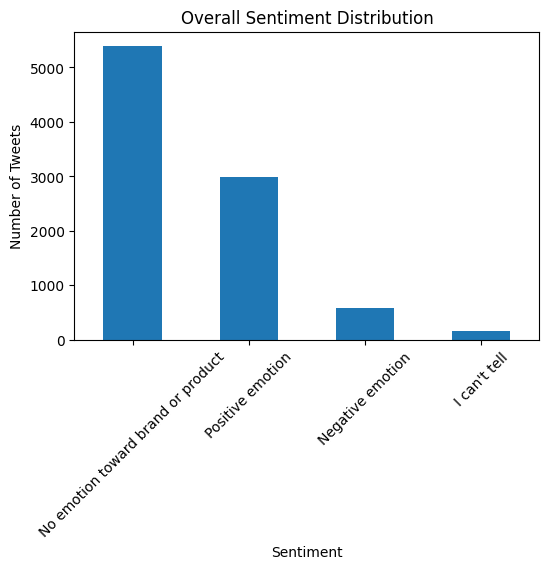

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
travel_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(
    kind='bar'
)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# Explanation
Most tweets show no strong emotion, fewer are positive, and even fewer negative.

# Sentiment by brand(TOP BRANDS)
Focusing on brands with the most tweets

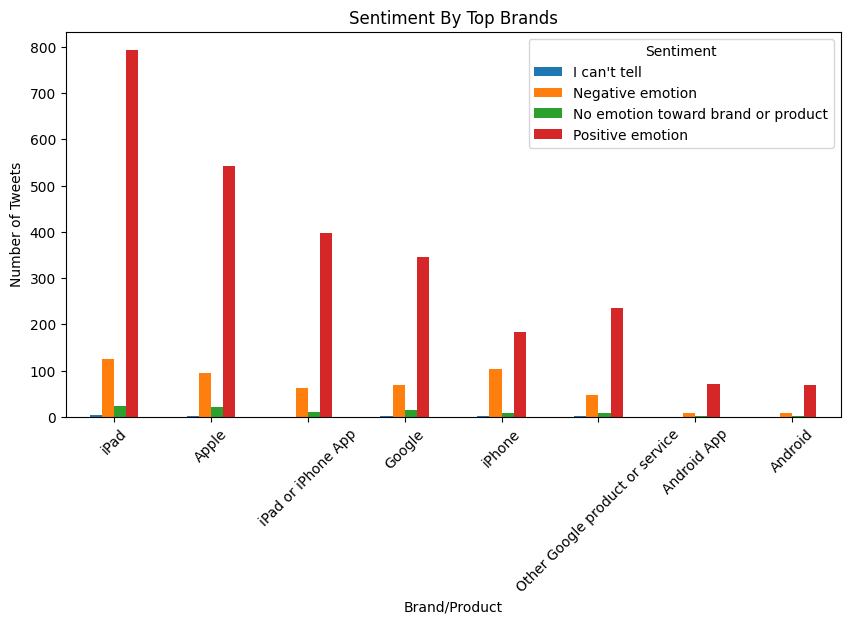

In [25]:
top_brands = travel_df['emotion_in_tweet_is_directed_at'].value_counts().head(8).index
top_brand_data = sentiment_pivot.loc[top_brands]
top_brand_data.plot(
    kind='bar',
    figsize=(10,5)
)
plt.title('Sentiment By Top Brands')
plt.xlabel('Brand/Product')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Percentage Sentiment per brand

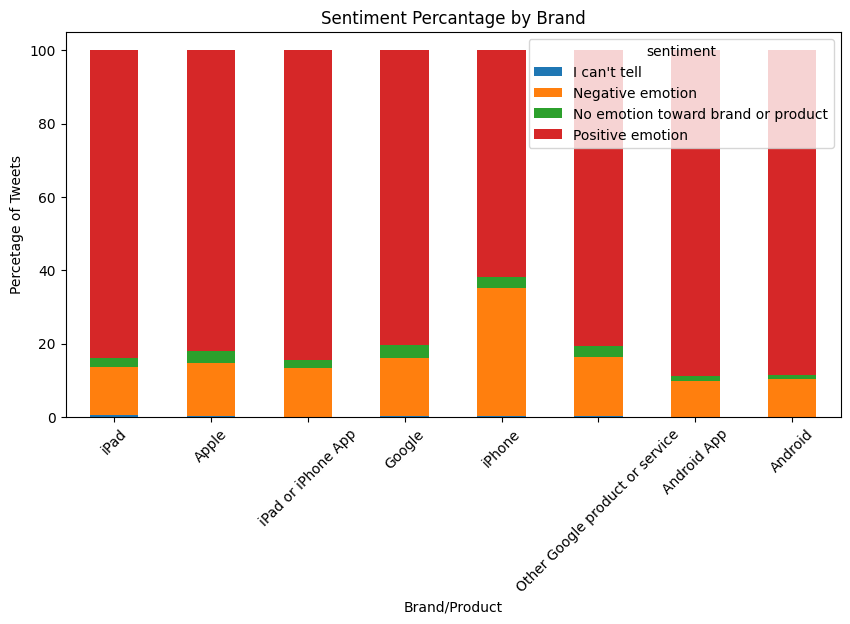

In [27]:
brand_percent = top_brand_data.div(top_brand_data.sum(axis=1), axis=0) * 100

brand_percent.plot(
    kind='bar',
    stacked= True,
    figsize=(10,5)
)
plt.title('Sentiment Percantage by Brand')
plt.xlabel('Brand/Product')
plt.ylabel('Percetage of Tweets')
plt.legend(title='sentiment')
plt.xticks(rotation=45)
plt.show()

# Explanation
The majority of tweets express no direct emotion response towards brands.

Positive sentiment outweighs negative sentiment across most products. 

Certain brands receive higher emotional engagement than others.

Negative sentiment, while less frequent, represents critical feedback.

# Conclusion
This project used twitter data to analyze how people feel about technology brands and products. Tweets were cleaned and converted into numerical features, then machine learning models were built to classify sentiment as positive, negative or neutral.

Logistic Regression performed best, especially after balancing the data to improve detection of negative sentiment. Visualizations and merged summaries showed that most tweets were positive or neutral, with some negative feedback across all brands.

Overall, the project shows how social media data can be used to understand customer opinions and support better decisions.